In [17]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean

In [2]:
# ==============================================================================
# Running this file loads tracers from old FESOM-REcoM2 output file (oce.mean.nc)
# and saves each tracer in an individual file
# 
#  Input:
#  - mesh_id: Name of mesh, will be added to the netcdf name
#  - meshpath: Speciefies where the target mesh is stored
#  - save_netcdf: If true, netcdf will be created
#  - delete_old_netcdf: If a netcdf file with the same name exists, a new cannot 
#    be made. If set to true, an old netcdf with the same name will be deleted
#
#  Output:
#  - netcdf file for each tracer in the old file
#  
#  During running, keep an eye on the output in the terminal, to see if it 
#  makes sense. 
#
# ==============================================================================

In [3]:
# Loading mesh for run

tracername = 'VNF'
mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
meshpath   = '/home/hbkoziel/pyfesom/data/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
input_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf/' 
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative



In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True) 
mesh

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh



FESOM mesh:
path                  = /gfs2/work/hbkvsk12/mesh/meshArc4.5
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 753179
number of 2d elements = 1480268
number of 3d nodes    = 16950142

        

In [27]:
year = 1985
ncfile	= input_directory+tracername+'.'+str(year)+'.monthly.nc'
f	= Dataset(ncfile,'r')
data = f.variables['VNF'][2,:]

For depth 0 model level -0.0 will be used
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  -0.0019696432732297466
Max and min:  11.509787613524736 -53.11085538238677


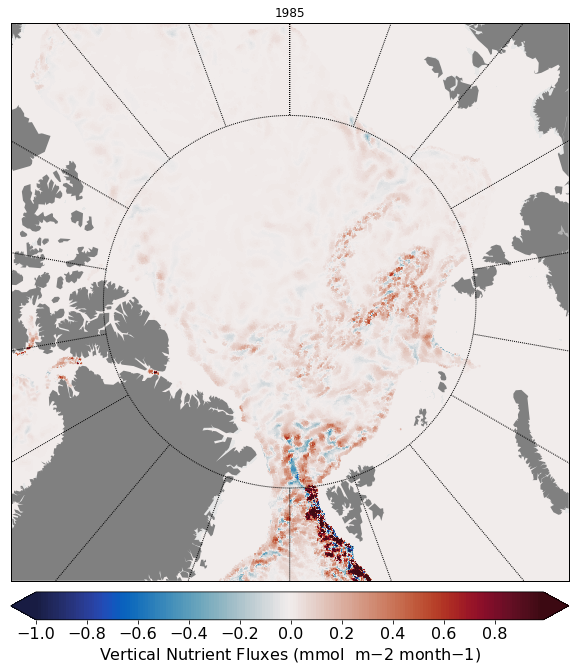

In [28]:
data2, elem_no_nan = pf.get_data(data,mesh,0)
data2 = np.copy(data2)
data2 = data2 * 1000
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.nanmean(data2)
print 'Max and min: ',np.nanmax(data2),np.nanmin(data2)

contours = np.arange(-1, 1, .01)

fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)

m = Basemap(projection='nplaea',boundinglat=75,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')

eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps

im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmocean.cm.balance, extend='both')
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([350]),colors='red',linewidths=2)
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([500]),colors='red',linewidths=2)

label = 'Vertical Nutrient Fluxes (mmol  m${-2}$ month${-1}$)'
plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16)

#plt.savefig(saving_directory+'ChlNano.png', dpi = 200, bbox_inches='tight')
plt.show()

In [29]:
year = 1985
ncfile	= input_directory+tracername+'.'+str(year)+'.monthly.nc'
f	= Dataset(ncfile,'r')
data = f.variables['VNF'][8,:]

For depth 0 model level -0.0 will be used
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  -0.00027098151981148715
Max and min:  0.6950038442870788 -0.6466654826918662


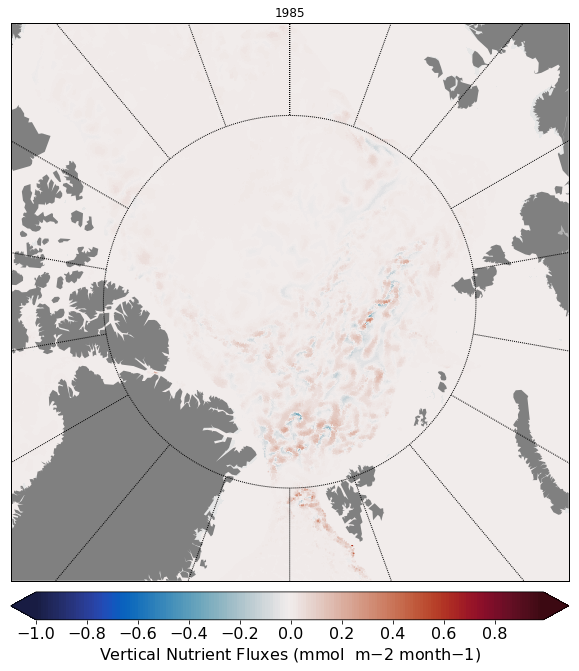

In [30]:
data2, elem_no_nan = pf.get_data(data,mesh,0)
data2 = np.copy(data2)
data2 = data2 * 1000
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.nanmean(data2)
print 'Max and min: ',np.nanmax(data2),np.nanmin(data2)

contours = np.arange(-1, 1, .01)

fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)

m = Basemap(projection='nplaea',boundinglat=75,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')

eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps

im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmocean.cm.balance, extend='both')
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([350]),colors='red',linewidths=2)
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([500]),colors='red',linewidths=2)

label = 'Vertical Nutrient Fluxes (mmol  m${-2}$ month${-1}$)'
plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16)

#plt.savefig(saving_directory+'ChlNano.png', dpi = 200, bbox_inches='tight')
plt.show()

In [31]:
year = 2007
ncfile	= input_directory+tracername+'.'+str(year)+'.monthly.nc'
f	= Dataset(ncfile,'r')
data = f.variables['VNF'][2,:]

For depth 0 model level -0.0 will be used
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  0.0024065271071690535
Max and min:  11.962404803929338 -38.27291816914396


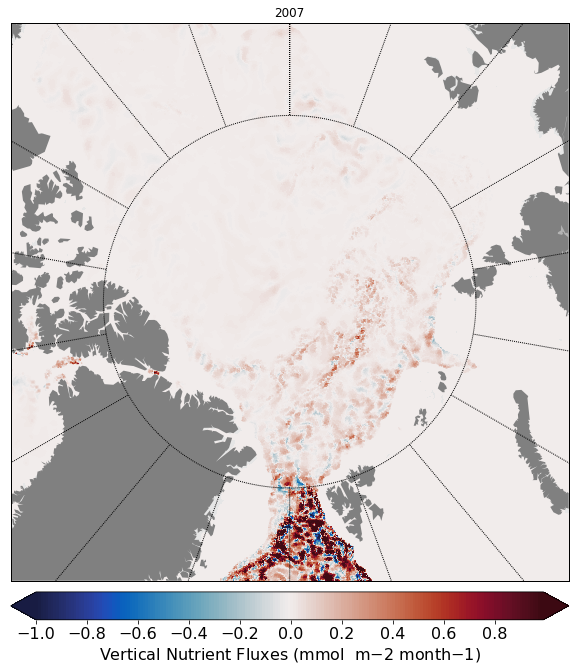

In [32]:
data2, elem_no_nan = pf.get_data(data,mesh,0)
data2 = np.copy(data2)
data2 = data2 * 1000
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.nanmean(data2)
print 'Max and min: ',np.nanmax(data2),np.nanmin(data2)

contours = np.arange(-1, 1, .01)

fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)

m = Basemap(projection='nplaea',boundinglat=75,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')

eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps

im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmocean.cm.balance, extend='both')
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([350]),colors='red',linewidths=2)
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([500]),colors='red',linewidths=2)

label = 'Vertical Nutrient Fluxes (mmol  m${-2}$ month${-1}$)'
plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16)

#plt.savefig(saving_directory+'ChlNano.png', dpi = 200, bbox_inches='tight')
plt.show()

In [33]:
year = 2007
ncfile	= input_directory+tracername+'.'+str(year)+'.monthly.nc'
f	= Dataset(ncfile,'r')
data = f.variables['VNF'][8,:]

For depth 0 model level -0.0 will be used
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  0.00010853529315226778
Max and min:  0.9264906364345756 -1.0586922690484095


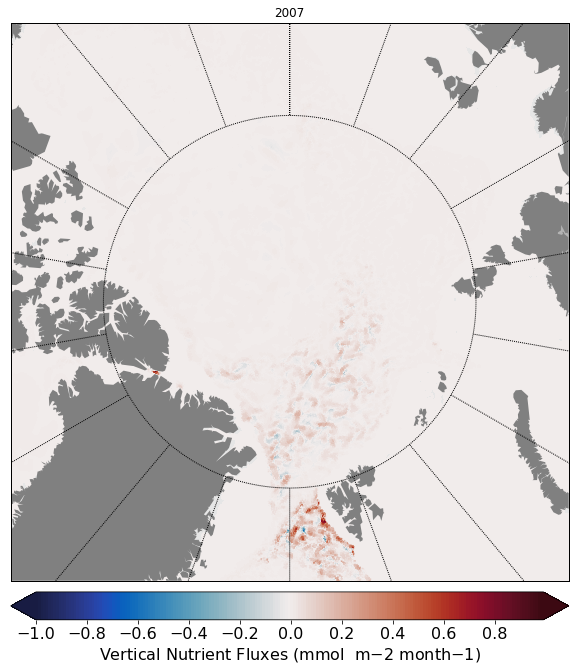

In [34]:
data2, elem_no_nan = pf.get_data(data,mesh,0)
data2 = np.copy(data2)
data2 = data2 * 1000
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.nanmean(data2)
print 'Max and min: ',np.nanmax(data2),np.nanmin(data2)

contours = np.arange(-1, 1, .01)

fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)

m = Basemap(projection='nplaea',boundinglat=75,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')

eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps

im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmocean.cm.balance, extend='both')
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([350]),colors='red',linewidths=2)
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([500]),colors='red',linewidths=2)

label = 'Vertical Nutrient Fluxes (mmol  m${-2}$ month${-1}$)'
plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16)

#plt.savefig(saving_directory+'ChlNano.png', dpi = 200, bbox_inches='tight')
plt.show()